In [2]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np
import ode 

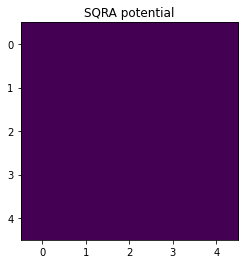

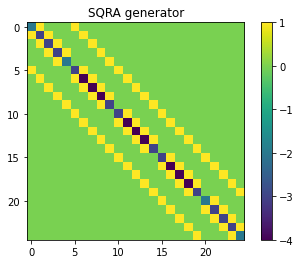

In [151]:
nx = 5
ny = 5


U = np.zeros((ny,nx))
s = sqra.sqra2d(U)
s.plot()

In [152]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptimNonaut(s, ts, penalty = 0.001)
j=o.j

Qs = [Q.toarray() for Q in j.Q]

In [153]:
Qs = [Q.toarray() for Q in j.Q] 
%timeit ode.finite_time_hitting_probs(j.Q, j.dt)# ode sparse
%timeit ode.finite_time_hitting_probs(Qs, j.dt) # ode dense
%timeit j.finite_time_hitting_probs() # galerkin

80.5 ms ± 5.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
60.7 ms ± 6.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
170 ms ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [154]:
def error(nt, dt):
    ts = ([dt]*nt)
    o = optim.SqraOptimNonaut(s, ts)
    j = o.j

    hpo = ode.finite_time_hitting_probs(j.Q, j.dt)
    hpj = j.finite_time_hitting_probs()
    return np.linalg.norm(hpo-hpj), hpo, hpj, j

error(3,1)[0]


0.6026131922163003

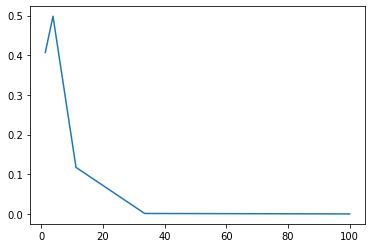

In [165]:
dts = np.logspace(0.1, 2, 5)
plt.plot(dts, [error(10,dt)[0] for dt in dts])

Text(0.5, 0, 'n')

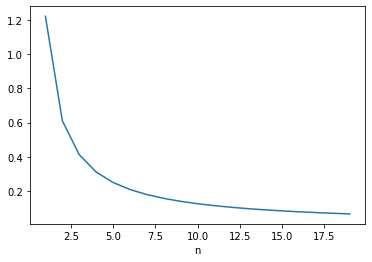

In [171]:
nt = np.arange(1,20)
plt.plot(nt, [error(n, 1/n)[0] for n in nt])
plt.xlabel("n")

In [172]:
e, hpo, hpj, j = error(30, 1/30)

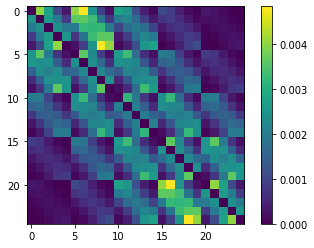

In [173]:
plt.imshow(hpo - hpj)
plt.colorbar()